# MIMC-CXR dataset

In [80]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import sys
from torch.utils.data import Subset
from torchvision import transforms
import tqdm

###
if '../' not in sys.path:
    sys.path = ['../'] + sys.path
from lib.data import MIMIC_ahrf, MIMIC_train_transform, MIMIC_test_transform, MIMIC
from lib.eval import plot_log

In [44]:
# mimic = MIMIC_ahrf('chf_scale')
mimic = MIMIC('Pneumonia')
mimic[0]

{'x': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=710x512 at 0x7FF391BE5A90>,
 'y': 1,
 'filename': '/data1/jiaxuan/CredibleConceptModel/notebooks/../lib/../datasets/mimic-cxr-preprocessed/p10/p10000764/s57375967/096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4.jpg',
 'patient_id': 57375967,
 'task': 'Pneumonia'}

In [74]:
print('# images:', len(mimic))

train_indices = list(range(100))
test_indices = list(range(100))
mimic_train = MIMIC_train_transform(Subset(mimic, train_indices))
mimic_test = MIMIC_test_transform(Subset(mimic, test_indices))

def show_data(d):
    '''d is dataset[idx]'''    
    filename = d['filename']

    print('--------------- represented in dataset')
    im, y = d['x'].permute(1,2,0), d['y'] 
    print('image size:',  im.shape)
    plt.imshow((im - im.min()) / (im.max() - im.min()))
    print(f'has {d["task"]}: {y}')
    plt.axis('off')
    plt.show()

# images: 106177


--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Pneumonia: 0


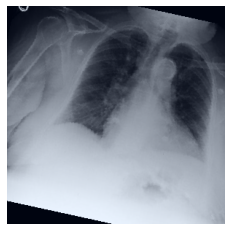

--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Pneumonia: 0


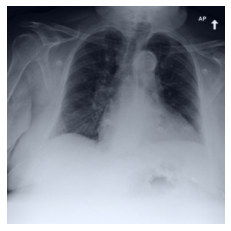

In [76]:
show_data(mimic_train[10])
show_data(mimic_test[10])

(<matplotlib.image.AxesImage at 0x7ff3a90ee6d0>, torch.Size([3, 512, 615]))

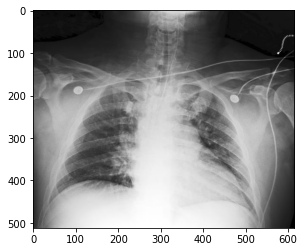

In [24]:
idx = 0
plt.imshow(mimic[idx]['x']), transforms.ToTensor()(mimic[idx]['x']).shape

--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Pneumonia: 0


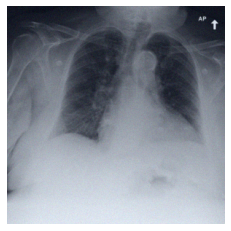

--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Pneumonia: 0


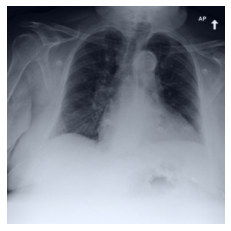

In [101]:
def show_noise(d, s=0.1):
    '''d is dataset[idx]'''    
    filename = d['filename']

    print('--------------- represented in dataset')
    im, y = (d['x'] + s * torch.randn_like(d['x'])).permute(1,2,0), d['y'] 
    print('image size:',  im.shape)
    plt.imshow((im - im.min()) / (im.max() - im.min()))
    print(f'has {d["task"]}: {y}')
    plt.axis('off')
    plt.show()
    
show_noise(mimic_test[10], 0.1)
show_data(mimic_test[10])

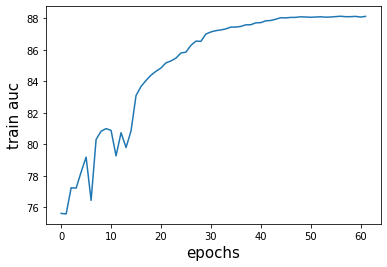

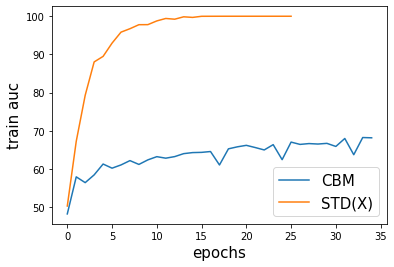

In [96]:
key = 'train auc'
plot_log(torch.load("../outputs/3b52388a27ea11ecb773ac1f6b24a434/standard.log"), key=key, label="C") # concept model
plt.show()
plot_log(torch.load("../outputs/cdfff6ba27fc11ecb773ac1f6b24a434/cbm.log"), key=key, label='CBM') # cbm
plot_log(torch.load("../outputs/d421aaf227c511ecb773ac1f6b24a434/standard.log"), key=key, label='STD(X)') # std(x)
plt.legend(fontsize=15)
plt.show()